## Progres vs. time for STAR taskFarmer job on Cori

In [9]:
logF='mon.farmer-7148595'
dbConFac=1.; taskExecFac=1.; taskDoneFac=1.
maxTimeMin=20000;
!pwd
logPath='./'
fname=logPath+logF
!ls  -l $fname 
from datetime import datetime
import dateutil.parser as tmparser

f = open(logPath+logF, 'r')
timeV =[]
totMinV=[]
dbConV=[]
taskDoneV=[]
taskExecV=[]
for rec in f:
    if rec[0]=='#':
        print (rec)
        continue
    vL=rec[:-1].split(',')    
    #print(vL)
    dayStr=vL[0]
    #print(dayStr,vL[2]) 
    
    date1=tmparser.parse(dayStr) 
    timeMin=float(vL[1])/60.
    #print(date1)
    timeV.append(date1)
    totMinV.append(timeMin)
    dbConV.append(float(vL[2])/dbConFac)
    taskDoneV.append(float(vL[3])/taskDoneFac)
    taskExecV.append(float(vL[4])/taskExecFac)
    if timeMin>maxTimeMin:
        break
print("last=",rec)    
print("nData=",len(totMinV))

/global/project/projectdirs/star/pwg/starlfs/zhux/bak.eliza14/embd/P11id/LambdaNalinda_AuAu200_2011.cori
-rw-rw---- 1 zhux zhux 41540 Sep 28 23:38 ./mon.farmer-7148595
#QAutil_1 taskList:starTask_20172901_101_109.list len:1008 N:11  node0:nid01271 ramBCF_Gb:123  partition:regular

#QAutil_2 farmer SKEW:3000  THREADS:50  NUM_EVE:1000

#

#format: date , totSec,  totDbCon, nDoneTask, nExeTask 

last= Thu Sep 28 23:38:26 PDT 2017 ,  41738,  19,  36, 500 

nData= 799


##  plot

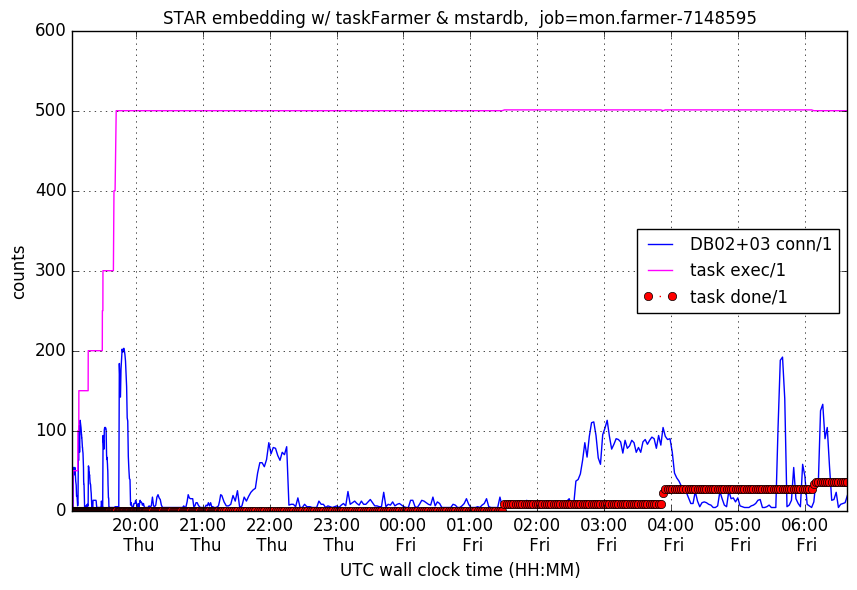

In [10]:
%matplotlib inline
import datetime
import numpy as np
import matplotlib.pylab as plt
from matplotlib.dates import DateFormatter

# matplotlib date format object
hfmt = DateFormatter('%H:%M\n %a')

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
fig.savefig('test2png.png', dpi=100)

# do the plotting
legBody=[]

ax.plot_date(timeV,dbConV, color='b', linestyle='-', marker=None ); legBody.append('DB02+03 conn/%.0f'%(dbConFac))
ax.plot_date(timeV,taskExecV, color='magenta', linestyle='-', marker=None); legBody.append('task exec/%0.f'%taskExecFac)
ax.plot_date(timeV,taskDoneV, 'ro-.'); legBody.append('task done/%0.f'%taskDoneFac)

# time axis
txtSZ=12
ax.xaxis.set_major_formatter(hfmt)
ax.set_ylim(bottom = 0)

#plt.xticks(rotation='vertical')
plt.subplots_adjust(bottom=.3)

# beautification
ax.set_ylabel('counts',   fontsize=txtSZ)
plt.rc('xtick', labelsize=txtSZ) 
plt.rc('ytick', labelsize=txtSZ) 
plt.xticks(rotation='0')

ax.set_xlabel('UTC wall clock time (HH:MM)', fontsize=txtSZ)
ax.set_title("STAR embedding w/ taskFarmer & mstardb,  job="+logF, fontsize=txtSZ)
legLoc='upper center'
legLoc='best'
plt.legend(legBody, loc=legLoc, fontsize=txtSZ)
plt.grid()
#plt.ylim(0,450)